In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


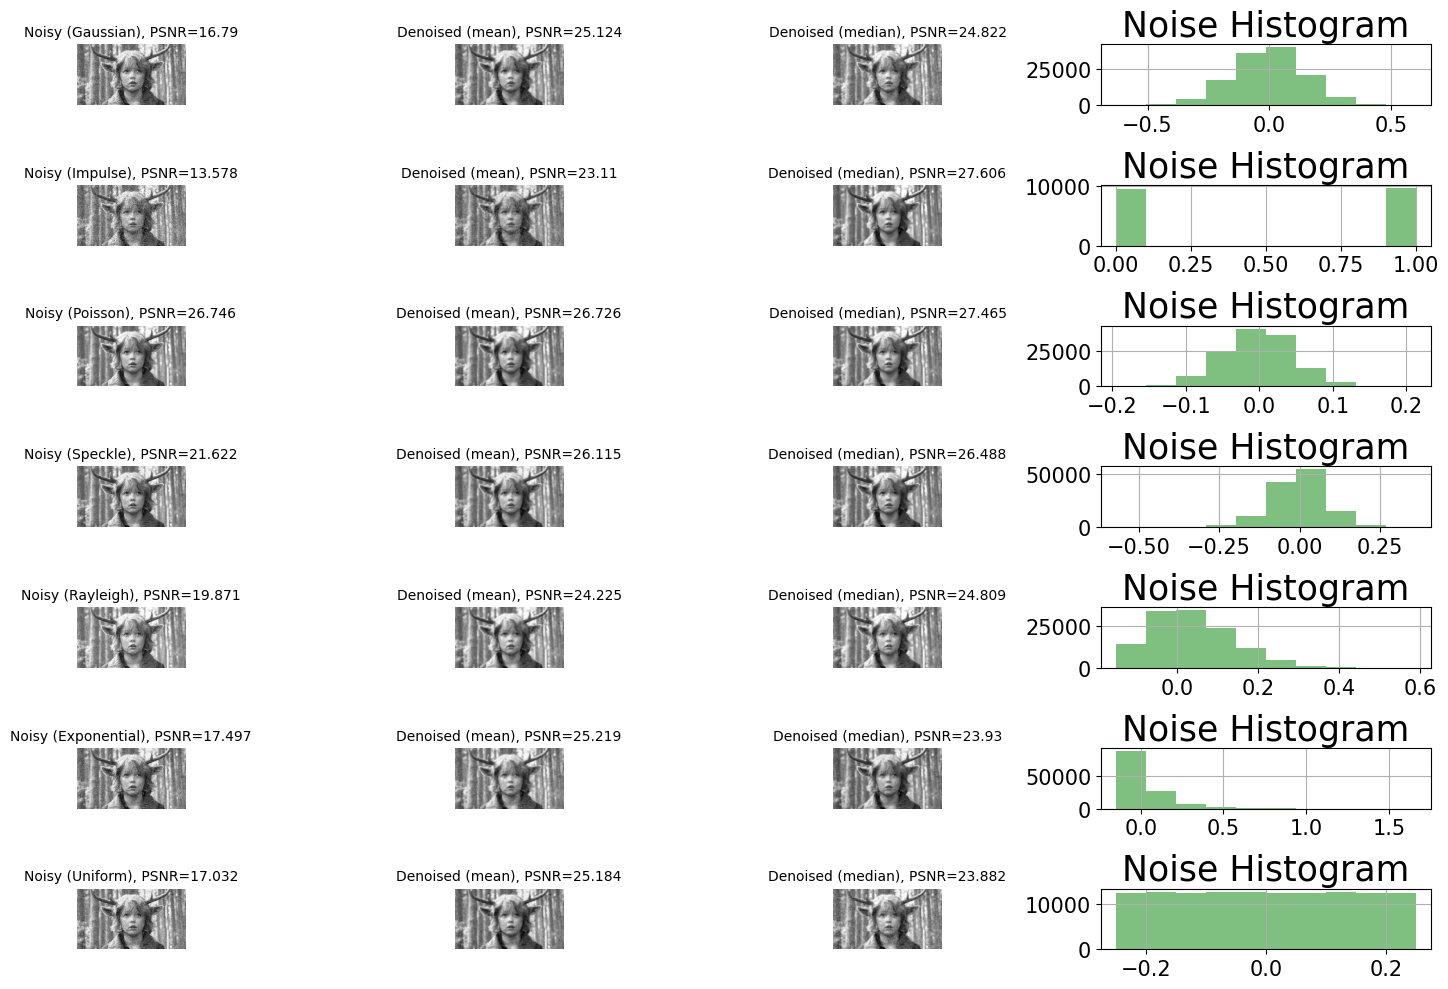

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.ndimage import uniform_filter, median_filter

def plt_hist(noise, bins=None):
    plt.grid()
    plt.hist(np.ravel(noise), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title('Noise Histogram', size=25)

def plt_images(im, im_noisy, noise, noise_type, i):
    im_denoised_mean = uniform_filter(im_noisy, 5)
    im_denoised_median = median_filter(im_noisy, 5)

    plt.subplot(7, 4, i)
    plt.imshow(im_noisy, cmap='gray')
    plt.title(f'Noisy ({noise_type}), PSNR={np.round(compare_psnr(im, im_noisy), 3)}', size=10)
    plt.axis('off')

    plt.subplot(7, 4, i+1)
    plt.imshow(im_denoised_mean, cmap='gray')
    plt.title(f'Denoised (mean), PSNR={np.round(compare_psnr(im, im_denoised_mean), 3)}', size=10)
    plt.axis('off')

    plt.subplot(7, 4, i+2)
    plt.imshow(im_denoised_median, cmap='gray')
    plt.title(f'Denoised (median), PSNR={np.round(compare_psnr(im, im_denoised_median), 3)}', size=10)
    plt.axis('off')

    plt.subplot(7, 4, i+3)
    plt_hist(noise)

im = rgb2gray(imread('/content/drive/MyDrive/images/sweet.jpeg'))

plt.figure(figsize=(15, 10))

im1 = random_noise(im, mode='gaussian', var=0.15**2)
plt_images(im, im1, im1 - im, 'Gaussian', 1)

im1 = random_noise(im, mode='s&p', amount=0.15)
plt_images(im, im1, im1[((im1 == 0) | (im1 == 1)) & ((im != 0) & (im != 1))], 'Impulse', 5)

noise = np.random.poisson(lam=int(np.mean(255 * im)), size=im.shape) / 255 - np.mean(im)
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Poisson', 9)

im1 = random_noise(im, mode='speckle', var=0.15**2)
plt_images(im, im1, im1 - im, 'Speckle', 13)

noise = np.random.rayleigh(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Rayleigh', 17)

noise = np.random.exponential(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Exponential', 21)

noise = np.random.uniform(0, 0.5, size=im.shape) - 0.25
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Uniform', 25)

plt.tight_layout()
plt.show()